# Tarea 2: Gradient Descent con Tensorflow
**Descripción general**
Se implementa gradient descent aplicado a regresión (usando la variable independiente con mayor correlación OverallQual y la variable dependiente SalePrice)

Se usará tensorflow y tensorboard para monitorear que el error disminuya conforme avanzan las iteraciones.

El proyecto consiste en crear modelos predictivos de regresión lineal uni-variable sencillos de la forma:

**y = f(x) =  mx +b**

Donde:

* y = la variable dependiente
* x = variable independiente
* m = pendiente de la recta(parámetro del modelo)
* b = intercepto(parámetro del modelo)

In [1]:
#Importando librerias necesarias para el proyecto
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
from datetime import date
from datetime import datetime

print(tf.__version__)

2.2.0


In [2]:
#Habilitando compatibilidad con tensorflow v1
if tf.__version__.startswith("2."):
  import tensorflow.compat.v1 as tf
  tf.compat.v1.disable_v2_behavior()
  tf.compat.v1.disable_eager_execution()
  print("Enabled compatitility to tf1.x")

Instructions for updating:
non-resource variables are not supported in the long term
Enabled compatitility to tf1.x


In [3]:
#Cargando datos
datos = np.load("proyecto_training_data.npy")
#Expresamos la variable SalesPrice en miles de dolares
datos = datos / np.array([1000,1,1,1,1,1]) 
#Verificando la forma de los datos
filas,columnas = datos.shape


**Eligiendo las variables a utilizar**

In [4]:
#SalesPrice
y_v = datos[:,0]
#SalesPrice
x_v = datos[:,1]
#Cantidad de datos
n=len(x_v)

**Función para estimar 'y' de forma vectorizada**

In [5]:
def calcular_yhat(param_modelo,matriz_entrenamiento):
    return tf.tensordot(param_modelo,matriz_entrenamiento,1)

**Función para calcular el error**

In [6]:
def calcular_error(y_real,y_calculada):
    return 1/2*tf.reduce_mean(tf.math.square(y_real - y_calculada))

**Función para definir y entrenar el modelo**

In [7]:
def entrenar_modelo_regresion_lineal(x_vector,y_vector,epochs,imprimir_error_cada,learning_rate):
    tf.reset_default_graph()
    g = tf.Graph()
    with g.as_default():    
        lr = tf.placeholder(tf.float32,name="lr")
        parametros_modelo = tf.get_variable("parametros",dtype=tf.float32, shape=[1,2],initializer=tf.zeros_initializer())
        x = tf.placeholder(tf.float32,[n],"x")
        y = tf.placeholder(tf.float32,[n],"y")
        #matriz_para_entrenar = np.column_stack((x,np.ones_like(x)))
        with tf.name_scope("vectorizando"):
            matriz_para_entrenar = tf.stack((x,tf.ones_like(x)))
        with tf.name_scope("modelo"):
            yhat = calcular_yhat(parametros_modelo,matriz_para_entrenar)
        with tf.name_scope("costo"):    
            error = calcular_error(y, yhat)
            error_summary = tf.summary.scalar(name='error_summary', tensor=error)
        with tf.name_scope("gradiente"):
            #grad = tf.gradients(error,[m,b])
            grad = tf.gradients(error,parametros_modelo)
        with tf.name_scope("actualizado_parametros"):
            new_params = tf.assign(parametros_modelo, parametros_modelo - lr*grad[0] )
        
        # Inicializar variables
        init = tf.global_variables_initializer()

        # Iniciando grafo
        with tf.Session(graph = g) as session:
            # Manejo de los logs en tensorboard
            writer = tf.summary.FileWriter('./tensorBoardLogs/'+ datetime.today().strftime('%Y-%m-%d_%H-%M-%S')
                                           + '_GadientDescent_lr=' + str(learning_rate)
                                           + '_epochs=' + str(epochs), session.graph)
            # Inicializamos las variables en la sesión
            session.run(init)       
            
            # batch gradient descent
            feed_dict = {x:x_vector, y:y_vector, lr:learning_rate}
            plt.scatter(x_vector,y_vector)
            for i in range(epochs+1):
                if (i>0 and i%imprimir_error_cada==0):
                    print("Gradiente del error respecto de m y b interación: ",i)
                    print(session.run(grad,feed_dict=feed_dict))
                summary_error = session.run(error_summary, feed_dict = feed_dict)
                writer.add_summary(summary_error, i)
                session.run(new_params,feed_dict=feed_dict)
                predicciones = session.run(yhat,feed_dict=feed_dict)
                plt.plot(x_vector,predicciones[-1,:],label=str(i))
            
            parametros_finales = session.run(parametros_modelo,feed_dict=feed_dict)
            print("Parametros finales: " , parametros_finales)
            plt.show()
            writer.close()

### Realización de experimentos

**Hipótesis:** Los modelos con learning rates más pequeños tardarán mas tiempo en converger debido a que los "pasos" al minimizar el error serán mas cortos. Los modelos con learning rates mas grandes podrían no converger debido a que los "pasos" al minimizar el error son tan grandes que no se podrían encontrar los mínimos.

Hiperparametros del modelo -> learning_rate:  0.04   epochs: 100
Gradiente del error respecto de m y b interación:  20
[array([[-0.77033633,  4.623085  ]], dtype=float32)]
Gradiente del error respecto de m y b interación:  40
[array([[-0.69591624,  4.456918  ]], dtype=float32)]
Gradiente del error respecto de m y b interación:  60
[array([[-0.6696566,  4.2898955]], dtype=float32)]
Gradiente del error respecto de m y b interación:  80
[array([[-0.64476067,  4.129073  ]], dtype=float32)]
Gradiente del error respecto de m y b interación:  100
[array([[-0.620512 ,  3.9743233]], dtype=float32)]
Parametros finales:  [[ 32.453632 -13.056988]]


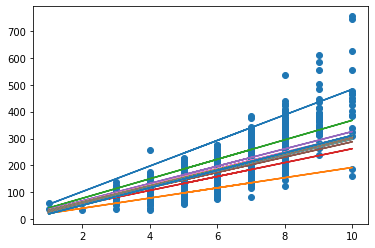

Hiperparametros del modelo -> learning_rate:  0.03   epochs: 100
Gradiente del error respecto de m y b interación:  20
[array([[-0.72996485,  4.674937  ]], dtype=float32)]
Gradiente del error respecto de m y b interación:  40
[array([[-0.70921594,  4.5429497 ]], dtype=float32)]
Gradiente del error respecto de m y b interación:  60
[array([[-0.6892659,  4.4146533]], dtype=float32)]
Gradiente del error respecto de m y b interación:  80
[array([[-0.6698454,  4.2899857]], dtype=float32)]
Gradiente del error respecto de m y b interación:  100
[array([[-0.6508277,  4.1688633]], dtype=float32)]
Parametros finales:  [[31.811693 -8.945457]]


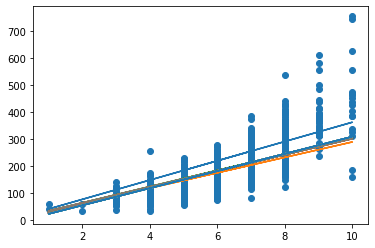

Hiperparametros del modelo -> learning_rate:  0.02   epochs: 100
Gradiente del error respecto de m y b interación:  20
[array([[-0.73690015,  4.719821  ]], dtype=float32)]
Gradiente del error respecto de m y b interación:  40
[array([[-0.72294015,  4.6305704 ]], dtype=float32)]
Gradiente del error respecto de m y b interación:  60
[array([[-0.70925415,  4.543005  ]], dtype=float32)]
Gradiente del error respecto de m y b interación:  80
[array([[-0.695828,  4.457099]], dtype=float32)]
Gradiente del error respecto de m y b interación:  100
[array([[-0.68271834,  4.372804  ]], dtype=float32)]
Parametros finales:  [[31.138342  -4.6327343]]


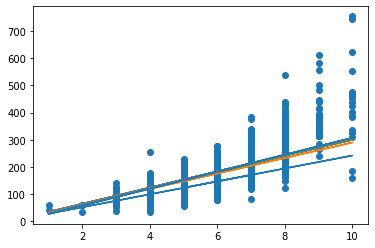

Hiperparametros del modelo -> learning_rate:  0.01   epochs: 100
Gradiente del error respecto de m y b interación:  20
[array([[-0.7865331,  4.758455 ]], dtype=float32)]
Gradiente del error respecto de m y b interación:  40
[array([[-0.7369505,  4.7198367]], dtype=float32)]
Gradiente del error respecto de m y b interación:  60
[array([[-0.7299263,  4.6750097]], dtype=float32)]
Gradiente del error respecto de m y b interación:  80
[array([[-0.7229888,  4.6306076]], dtype=float32)]
Gradiente del error respecto de m y b interación:  100
[array([[-0.7160862,  4.5866313]], dtype=float32)]
Parametros finales:  [[30.432056   -0.10907391]]


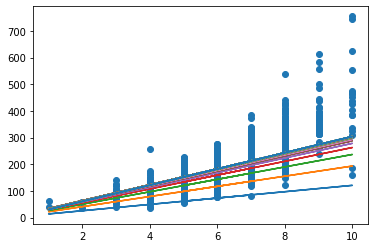

Hiperparametros del modelo -> learning_rate:  0.008   epochs: 100
Gradiente del error respecto de m y b interación:  20
[array([[-1.2688739,  4.6924753]], dtype=float32)]
Gradiente del error respecto de m y b interación:  40
[array([[-0.73997  ,  4.7378597]], dtype=float32)]
Gradiente del error respecto de m y b interación:  60
[array([[-0.7341372,  4.7018585]], dtype=float32)]
Gradiente del error respecto de m y b interación:  80
[array([[-0.7284904,  4.6661086]], dtype=float32)]
Gradiente del error respecto de m y b interación:  100
[array([[-0.7230081,  4.6306133]], dtype=float32)]
Parametros finales:  [[30.28671     0.82186174]]


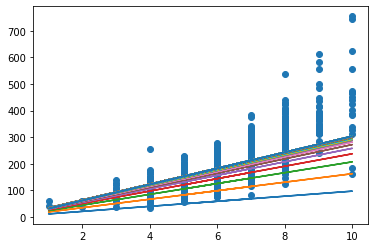

Hiperparametros del modelo -> learning_rate:  0.006   epochs: 100
Gradiente del error respecto de m y b interación:  20
[array([[-5.6130023,  4.0235662]], dtype=float32)]
Gradiente del error respecto de m y b interación:  40
[array([[-0.7624052,  4.752922 ]], dtype=float32)]
Gradiente del error respecto de m y b interación:  60
[array([[-0.73837626,  4.72886   ]], dtype=float32)]
Gradiente del error respecto de m y b interación:  80
[array([[-0.7340711,  4.701873 ]], dtype=float32)]
Gradiente del error respecto de m y b interación:  100
[array([[-0.72992134,  4.675024  ]], dtype=float32)]
Parametros finales:  [[30.139967   1.7617221]]


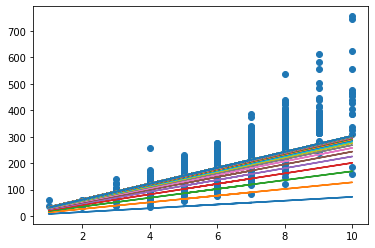

Hiperparametros del modelo -> learning_rate:  0.004   epochs: 100
Gradiente del error respecto de m y b interación:  20
[array([[-36.912544  ,  -0.85390884]], dtype=float32)]
Gradiente del error respecto de m y b interación:  40
[array([[-1.8448441,  4.6025534]], dtype=float32)]
Gradiente del error respecto de m y b interación:  60
[array([[-0.775995 ,  4.7508016]], dtype=float32)]
Gradiente del error respecto de m y b interación:  80
[array([[-0.7407839,  4.7377396]], dtype=float32)]
Gradiente del error respecto de m y b interación:  100
[array([[-0.7369427,  4.71985  ]], dtype=float32)]
Parametros finales:  [[29.991817  2.710597]]


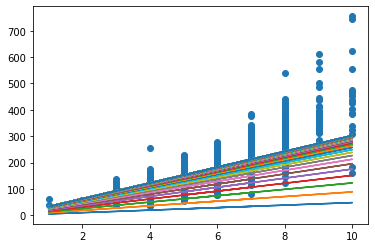

Hiperparametros del modelo -> learning_rate:  0.003   epochs: 100
Gradiente del error respecto de m y b interación:  20
[array([[-92.6068  ,  -9.544831]], dtype=float32)]
Gradiente del error respecto de m y b interación:  40
[array([[-7.83995  ,  3.6758735]], dtype=float32)]
Gradiente del error respecto de m y b interación:  60
[array([[-1.2924001,  4.6841426]], dtype=float32)]
Gradiente del error respecto de m y b interación:  80
[array([[-0.7848898,  4.7494144]], dtype=float32)]
Gradiente del error respecto de m y b interación:  100
[array([[-0.7437217,  4.7419157]], dtype=float32)]
Parametros finales:  [[29.917141   3.1884315]]


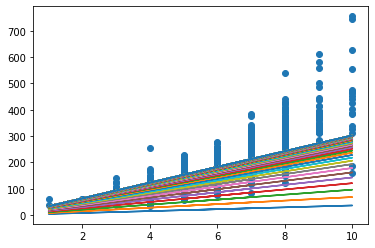

Hiperparametros del modelo -> learning_rate:  0.002   epochs: 100
Gradiente del error respecto de m y b interación:  20
[array([[-224.58057 ,  -30.145372]], dtype=float32)]
Gradiente del error respecto de m y b interación:  40
[array([[-42.863926 ,  -1.7831037]], dtype=float32)]
Gradiente del error respecto de m y b interación:  60
[array([[-8.671209,  3.546087]], dtype=float32)]
Gradiente del error respecto de m y b interación:  80
[array([[-2.236495 ,  4.5414042]], dtype=float32)]
Gradiente del error respecto de m y b interación:  100
[array([[-1.0245985,  4.7212973]], dtype=float32)]
Parametros finales:  [[29.835806   3.6675665]]


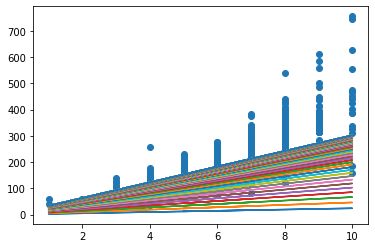

Hiperparametros del modelo -> learning_rate:  0.001   epochs: 100
Gradiente del error respecto de m y b interación:  20
[array([[-525.8366 ,  -77.17616]], dtype=float32)]
Gradiente del error respecto de m y b interación:  40
[array([[-232.52348 ,  -31.385504]], dtype=float32)]
Gradiente del error respecto de m y b interación:  60
[array([[-103.05439 ,  -11.176032]], dtype=float32)]
Gradiente del error respecto de m y b interación:  80
[array([[-45.90598  ,  -2.2580628]], dtype=float32)]
Gradiente del error respecto de m y b interación:  100
[array([[-20.680246 ,   1.6757795]], dtype=float32)]
Parametros finales:  [[29.289354  4.076434]]


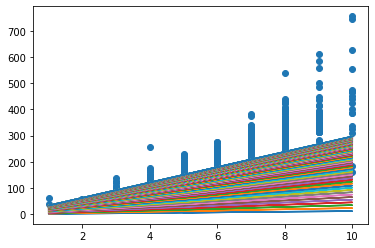

In [9]:
# La primera columna representa el learning rate 
# y la segunda la cantidad de epochs (en este caso se usa un valor fijo de 100 
# para poder comparar de igual forma cada exerimento)
hiperparametros = [[0.0400,100],[0.0300,100],
                   [0.0200,100],[0.0100,100],
                   [0.0080,100],[0.0060,100],
                   [0.0040,100],[0.0030,100],
                   [0.0020,100],[0.0010,100]]

for x in range(len(hiperparametros)):
    print("Hiperparametros del modelo -> learning_rate: ", hiperparametros[x][0], "  epochs:", hiperparametros[x][1])
    entrenar_modelo_regresion_lineal(x_v,y_v,int(hiperparametros[x][1]),20,hiperparametros[x][0])


### Uso de TensorBoard para visualizar grafo y monitorear error

<img src="Tensorboard.png">

<img src="GradientDescentTensorBoard.gif">

### Conclusión: 

El modelo con learning rate de **0.02** es el que más rápido empieza a converger pero el modelo con learninng rate de **0.04** presenta un error menor en los gradientes respecto a "m" y "b" al finalizar la iteración 100.


**Salida final del modelo con learning rate de 0.02**
* Gradiente del error respecto de m y b interación:  100
* [array([[-0.68271834,  4.372804  ]], dtype=float32)]
* Parametros finales:  [[31.138342  -4.6327343]]

**Salida final del modelo con learning rate de 0.04**
* Gradiente del error respecto de m y b interación:  100
* [array([[-0.620512 ,  3.9743233]], dtype=float32)]
* Parametros finales:  [[ 32.453632 -13.056988]]

<br><br>
**Análisis epoch 3**
<img src="AnalisisEpoch3.png">

<br><br>
**Análisis epoch 100**
<img src="AnalisisEpoch100.png">


### Importancia de la elección correcta de learning rate
Es importate elegir correctamente el learning rata ya que una mala elcción puede ocasionar que el modelo no converja, para demostrar esto vamos a experimentar con un learning rate en el rango entre **0.490 al 0.499**

Hiperparametros del modelo -> learning_rate:  0.049   epochs: 100
Gradiente del error respecto de m y b interación:  50
[array([[-183.15068 ,  -24.211678]], dtype=float32)]
Gradiente del error respecto de m y b interación:  100
[array([[-28.587124 ,  -0.5635951]], dtype=float32)]
Parametros finales:  [[ 33.678684 -16.487963]]


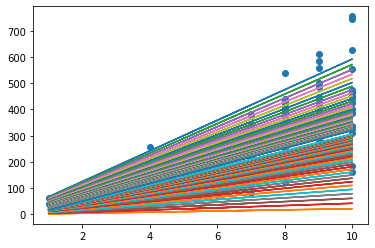

Hiperparametros del modelo -> learning_rate:  0.0491   epochs: 100
Gradiente del error respecto de m y b interación:  50
[array([[-225.24289,  -30.78464]], dtype=float32)]
Gradiente del error respecto de m y b interación:  100
[array([[-42.989708 ,  -2.8141513]], dtype=float32)]
Parametros finales:  [[ 34.035183 -16.47168 ]]


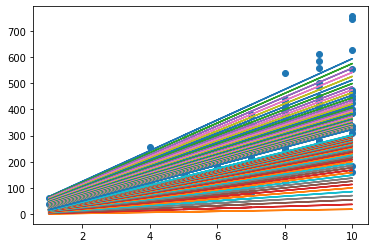

Hiperparametros del modelo -> learning_rate:  0.0492   epochs: 100
Gradiente del error respecto de m y b interación:  50
[array([[-276.8049  ,  -38.836132]], dtype=float32)]
Gradiente del error respecto de m y b interación:  100
[array([[-64.69289  ,  -6.2045574]], dtype=float32)]
Parametros finales:  [[ 34.57153  -16.427303]]


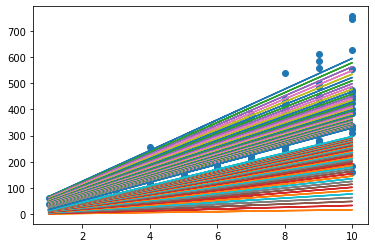

Hiperparametros del modelo -> learning_rate:  0.0493   epochs: 100
Gradiente del error respecto de m y b interación:  50
[array([[-339.9187 ,  -48.69121]], dtype=float32)]
Gradiente del error respecto de m y b interación:  100
[array([[-97.342125 , -11.3039875]], dtype=float32)]
Parametros finales:  [[ 35.378647 -16.340622]]


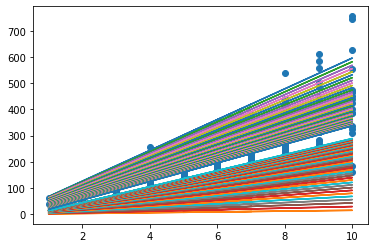

Hiperparametros del modelo -> learning_rate:  0.0494   epochs: 100
Gradiente del error respecto de m y b interación:  50
[array([[-417.10565 ,  -60.743553]], dtype=float32)]
Gradiente del error respecto de m y b interación:  100
[array([[-146.37541 ,  -18.961477]], dtype=float32)]
Parametros finales:  [[ 36.592735 -16.190388]]


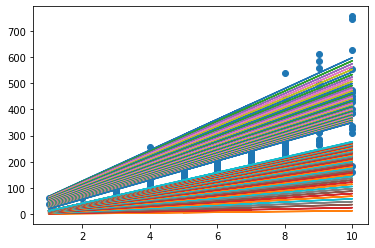

Hiperparametros del modelo -> learning_rate:  0.0495   epochs: 100
Gradiente del error respecto de m y b interación:  50
[array([[-511.42365,  -75.47059]], dtype=float32)]
Gradiente del error respecto de m y b interación:  100
[array([[-219.8894 ,  -30.44117]], dtype=float32)]
Parametros finales:  [[ 38.417397 -15.944792]]


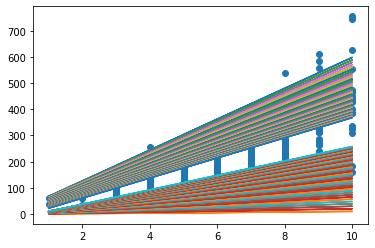

Hiperparametros del modelo -> learning_rate:  0.0496   epochs: 100
Gradiente del error respecto de m y b interación:  50
[array([[-626.58923 ,  -93.452576]], dtype=float32)]
Gradiente del error respecto de m y b interación:  100
[array([[-329.93234 ,  -47.624176]], dtype=float32)]
Parametros finales:  [[ 41.156864 -15.55637 ]]


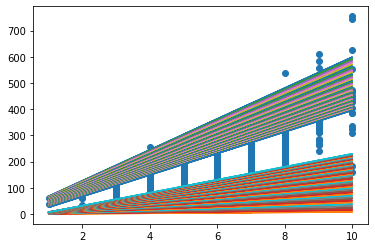

Hiperparametros del modelo -> learning_rate:  0.0497   epochs: 100
Gradiente del error respecto de m y b interación:  50
[array([[-767.0813 , -115.38881]], dtype=float32)]
Gradiente del error respecto de m y b interación:  100
[array([[-494.37012,  -73.29991]], dtype=float32)]
Parametros finales:  [[ 45.264103 -14.95438 ]]


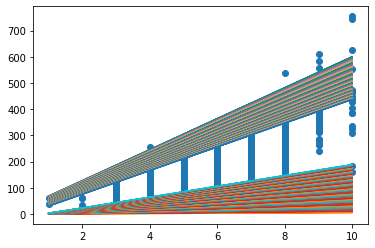

Hiperparametros del modelo -> learning_rate:  0.0498   epochs: 100
Gradiente del error respecto de m y b interación:  50
[array([[-938.3554, -142.1311]], dtype=float32)]
Gradiente del error respecto de m y b interación:  100
[array([[-739.7215 , -111.60876]], dtype=float32)]
Parametros finales:  [[ 51.41418 -14.03339]]


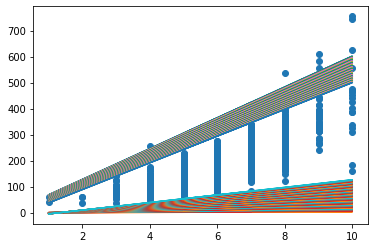

Hiperparametros del modelo -> learning_rate:  0.0499   epochs: 100
Gradiente del error respecto de m y b interación:  50
[array([[-1146.9623 ,  -174.70222]], dtype=float32)]
Gradiente del error respecto de m y b interación:  100
[array([[-1105.1703 ,  -168.66858]], dtype=float32)]
Parametros finales:  [[ 60.608646 -12.637073]]


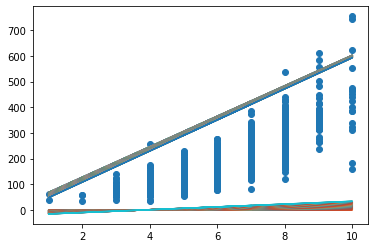

In [18]:
hiperparametros = [[0.0490,100],[0.0491,100],
                   [0.0492,100],[0.0493,100],
                   [0.0494,100],[0.0495,100],
                   [0.0496,100],[0.0497,100],
                   [0.0498,100],[0.0499,100]]

for x in range(len(hiperparametros)):
    print("Hiperparametros del modelo -> learning_rate: ", hiperparametros[x][0], "  epochs:", hiperparametros[x][1])
    entrenar_modelo_regresion_lineal(x_v,y_v,int(hiperparametros[x][1]),50,hiperparametros[x][0])